### A Data-Driven Exploration of Shopping Mall Insights​


### Import needed libraries

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


### Loading Data from an Excel File

In [12]:
# File Paths
mall_data_path = r"C:\Users\Brighty Davis\OneDrive\Desktop\Predictive\Fundamentsl of Programming\archive\shopping_mall_data.xlsx"
sales_data_path = r"C:\Users\Brighty Davis\OneDrive\Desktop\Predictive\Fundamentsl of Programming\archive\sales_data.xlsx"
customer_data_path = r"C:\Users\Brighty Davis\OneDrive\Desktop\Predictive\Fundamentsl of Programming\archive\customer_data.xlsx"

# Load and Preview Sales Data
sales_data = pd.read_excel(sales_data_path, engine='openpyxl')
print("Sales Data Preview:")
print(sales_data.head())

# Load and Preview Customer Data
customer_data = pd.read_excel(customer_data_path, engine='openpyxl')
print("\nCustomer Data Preview:")
print(customer_data.head())


mall_data = pd.read_excel(mall_data_path, engine='openpyxl')
print("\nMall Data Preview:")
print(mall_data.head())

Sales Data Preview:
  invoice_no customer_id  category  quantity invoice date    price  \
0    I138884     C241288  Clothing         5   05/08/2022  1500.40   
1    I317333     C111565     Shoes         3   12/12/2021  1800.51   
2    I127801     C266599  Clothing         1   09/11/2021   300.08   
3    I173702     C988172     Shoes         5   05/16/2021  3000.85   
4    I337046     C189076     Books         4   10/24/2021    60.60   

              shopping_mall  
0         South Coast Plaza  
1            Beverly Center  
2    Westfield Century City  
3  Stanford Shopping Center  
4         South Coast Plaza  

Customer Data Preview:
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash

Mall Data Preview:
            shopping_mall  construction_year  area (sqm)     location  \
0   

### Dataset Overview and Structure

In [13]:
# Display Dataset Information
print("\nSales Data Information:")
sales_data.info()

print("\nCustomer Data Information:")
customer_data.info()


print("\nShopping Mall Data Information:")
mall_data.info()



Sales Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   invoice date   99457 non-null  object 
 5   price          99457 non-null  float64
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB

Customer Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dty

### Check datatype of the dataset

In [19]:
sales_data.dtypes
mall_data.dtypes
customer_data.dtypes

customer_id        object
gender             object
age               float64
payment_method     object
dtype: object

### Check the missing value of the dataset

In [29]:
print(sales_data.isnull().sum())
print(customer_data.isnull().sum())
print(mall_data.isnull().sum())


invoice_no       0
customer_id      0
category         0
quantity         0
invoice date     0
price            0
shopping_mall    0
dtype: int64
customer_id         0
gender              0
age               119
payment_method      0
dtype: int64
shopping_mall        0
construction_year    0
area (sqm)           0
location             0
store_count          0
dtype: int64


### Removing Duplicate Entries from Datasets

In [34]:
sales_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(inplace=True)
mall_data.drop_duplicates(inplace=True)

### Merging Datasets and Saving the Results

In [37]:
# Merging Sales and Customer Data
merged_sales_customer = pd.merge(sales_data, customer_data, on='customer_id', how='left')


# Merging with Shopping Mall Data
merged_data = pd.merge(merged_sales_customer, mall_data, on='shopping_mall', how='left')

# Save the final merged dataset to an Excel file
final_output_path = r"C:\Users\Brighty Davis\OneDrive\Desktop\Predictive\Fundamentals of Programming\merged_shopping_data.xlsx"
merged_data.to_excel(final_output_path, index=False)
print(f"Final merged dataset saved to: {final_output_path}")


Final merged dataset saved to: C:\Users\Brighty Davis\OneDrive\Desktop\Predictive\Fundamentals of Programming\merged_shopping_data.xlsx


### Checking for Missing Values in the Merged Dataset

In [40]:
# Check for missing values in all columns
missing_data = merged_data.isnull().sum()

# Display the number of missing values per column
print(missing_data)

# Check for any columns with missing data
missing_columns = missing_data[missing_data > 0].index.tolist()
if missing_columns:
    print(f"Columns with missing data: {missing_columns}")
else:
    print("No missing data in any column.")


invoice_no              0
customer_id             0
category                0
quantity                0
invoice date            0
price                   0
shopping_mall           0
gender                  0
age                   119
payment_method          0
construction_year    4991
area (sqm)           4991
location             4991
store_count          4991
dtype: int64
Columns with missing data: ['age', 'construction_year', 'area (sqm)', 'location', 'store_count']


In [42]:
# Calculate the missing percentage for the 'age' column in merged_data
missing_percentage = (merged_data['age'].isnull().sum() / len(merged_data)) * 100
print(f"Missing Age Percentage in merged_data: {missing_percentage}%")


Missing Age Percentage in merged_data: 0.11964969785937642%


In [44]:
merged_data = merged_data.dropna(subset=['age'])

In [48]:
# Update rows in the dataset with proper data type conversion
merged_data.loc[
    merged_data['shopping_mall'] == 'Irvine Spectrum',
    ['construction_year', 'area (sqm)', 'location', 'store_count']
] = [1995, 120000, 'Irvine', 130] 


In [50]:
merged_data.to_excel(r"C:\Users\Brighty Davis\OneDrive\Desktop\Predictive\Fundamentals of Programming\final_dataset.xlsx", index=False)

### Validate the dataset

In [53]:
print(merged_data.duplicated().sum())

0


In [55]:
print(merged_data['category'].value_counts()) 

category
Clothing           34445
Cosmetics          15084
Food & Beverage    14761
Toys               10071
Shoes              10015
Technology          4995
Souvenir            4991
Books               4976
Name: count, dtype: int64


### Seasonal Shopping Pattern

In [58]:
#Seasonal shopping patterns:
merged_data['month'] = pd.to_datetime(merged_data['invoice date']).dt.month
merged_data['season'] = merged_data['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')


### Total Spend

In [63]:
merged_data['total_spend'] = merged_data['price'] * merged_data['quantity']

### Categorize Customer

In [67]:
# Define spending thresholds and categories
def categorize_customer(spend):
    if spend <= 3000:
        return 'Casual Customer'
    elif 3000 < spend <= 8000:
        return 'Regular Customer'
    else:
        return 'Premium Customer'

# Apply the function to the 'total_spend' column
merged_data['customer_category'] = merged_data['total_spend'].apply(categorize_customer)


In [69]:
#Segment customers by age group for demographic analysis.
# Define age groups
bins = [0, 18, 25, 35, 50, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins, labels=labels)

In [71]:
# Extract Day and Year  from the Invoice Date
merged_data['day_of_week'] = pd.to_datetime(merged_data['invoice date']).dt.day_name()
merged_data['year'] = pd.to_datetime(merged_data['invoice date']).dt.year

In [73]:
# Group spending by season and category
seasonal_trends = merged_data.groupby(['season', 'category'])['total_spend'].sum().reset_index()
print(seasonal_trends)

    season         category  total_spend
0     Fall            Books    194813.85
1     Fall         Clothing  27013801.76
2     Fall        Cosmetics   1619772.42
3     Fall  Food & Beverage    196365.58
4     Fall            Shoes  15204706.78
5     Fall         Souvenir    139493.16
6     Fall       Technology  13594350.00
7     Fall             Toys    988718.08
8   Spring            Books    200358.75
9   Spring         Clothing  27767302.64
10  Spring        Cosmetics   1632051.74
11  Spring  Food & Beverage    209686.39
12  Spring            Shoes  16900787.20
13  Spring         Souvenir    155082.33
14  Spring       Technology  13921950.00
15  Spring             Toys    931087.36
16  Summer            Books    199737.60
17  Summer         Clothing  27548844.40
18  Summer        Cosmetics   1648966.30
19  Summer  Food & Beverage    211684.25
20  Summer            Shoes  15959720.64
21  Summer         Souvenir    159246.48
22  Summer       Technology  14167650.00
23  Summer      

### Payment Preference

In [94]:
# Calculate payment preference count for each age group and payment method
payment_preference = merged_data.groupby(['age_group', 'payment_method'], observed=True).size().reset_index(name='count')

# Calculate percentage within each age group
payment_preference['percentage'] = (
    payment_preference['count'] / payment_preference.groupby('age_group')['count'].transform('sum') * 100
)




C:\Users\Brighty Davis\AppData\Local\Temp\ipykernel_32516\252359345.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_preference['count'] / payment_preference.groupby('age_group')['count'].transform('sum') * 100


In [97]:
merged_data.to_excel(r"C:\Users\Brighty Davis\OneDrive\Desktop\Predictive\Fundamentals of Programming\archive\Full_Shopping_Dataset.xlsx", index=False)

### Purchase Frequency

In [100]:
# Calculate purchase frequency per customer
purchase_frequency = merged_data.groupby('customer_id').size().reset_index(name='purchase_frequency')

# Merge this back with the main DataFrame to add the purchase frequency as a new column
merged_data = merged_data.merge(purchase_frequency, on='customer_id', how='left')

# Display the first few rows to verify
print(merged_data.head())


  invoice_no customer_id  category  quantity invoice date    price  \
0    I138884     C241288  Clothing         5   2022-05-08  1500.40   
1    I317333     C111565     Shoes         3   2021-12-12  1800.51   
2    I127801     C266599  Clothing         1   2021-09-11   300.08   
3    I173702     C988172     Shoes         5   2021-05-16  3000.85   
4    I337046     C189076     Books         4   2021-10-24    60.60   

              shopping_mall  gender   age payment_method  ...  store_count  \
0         South Coast Plaza  Female  28.0    Credit Card  ...        270.0   
1            Beverly Center    Male  21.0     Debit Card  ...        160.0   
2    Westfield Century City    Male  20.0           Cash  ...        200.0   
3  Stanford Shopping Center  Female  66.0    Credit Card  ...        140.0   
4         South Coast Plaza  Female  53.0           Cash  ...        270.0   

  month  season  total_spend  customer_category    age_group  day_of_week  \
0     5  Spring      7502.00   Re

### 1. How do different age groups within a mall's customer base prefer to pay for their purchases, and what factors influence their payment method preferences?

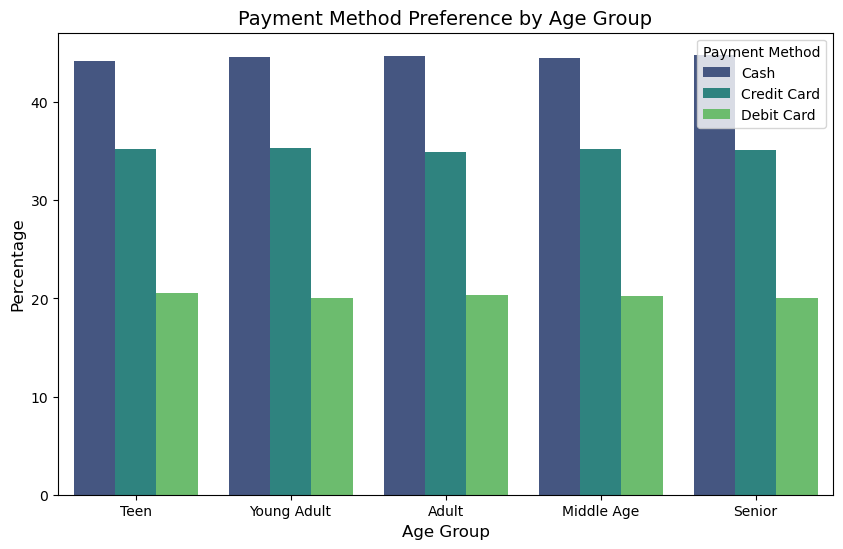

In [349]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='age_group', 
    y='percentage', 
    hue='payment_method', 
    data=payment_preference, 
    palette='viridis'
)

# Add title and labels
plt.title('Payment Method Preference by Age Group', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.legend(title='Payment Method')
plt.show()



### 2.What are the revenue metrics across different locations in the mall, and how do the average revenues per store vary by location?

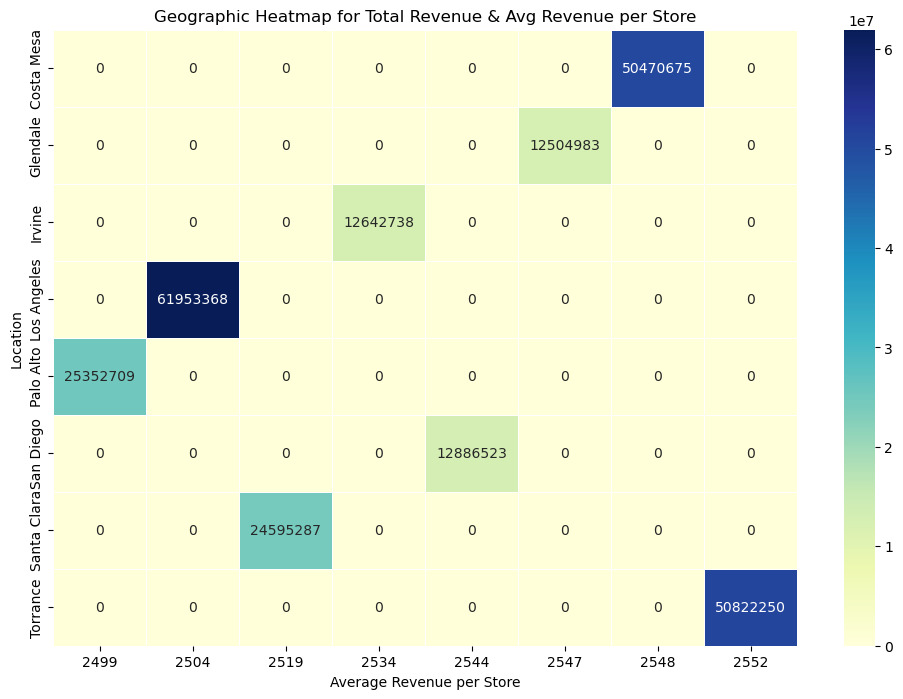

In [125]:
location_metrics = merged_data.groupby('location').agg(
    total_revenue=('total_spend', 'sum'),
    avg_revenue_per_store=('total_spend', 'mean')
).reset_index()
# Round avg_revenue_per_store to integers
location_metrics['avg_revenue_per_store'] = location_metrics['avg_revenue_per_store'].round().astype(int)

# Ensure total_revenue values are also integers
location_metrics['total_revenue'] = location_metrics['total_revenue'].round().astype(int)

# Create a pivot table for the heatmap
heatmap_data = location_metrics.pivot_table(
    values='total_revenue',
    index='location',
    columns='avg_revenue_per_store',
    fill_value=0
)

# Ensure pivot table values are integers
heatmap_data = heatmap_data.astype(int)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Geographic Heatmap for Total Revenue & Avg Revenue per Store")
plt.xlabel('Average Revenue per Store')
plt.ylabel('Location')
plt.show()

### How do revenue trends vary across different seasons over multiple years at the mall?

C:\Users\Brighty Davis\AppData\Local\Temp\ipykernel_32516\1778278945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_analysis_by_season = merged_data.groupby(['year', 'season']).agg(


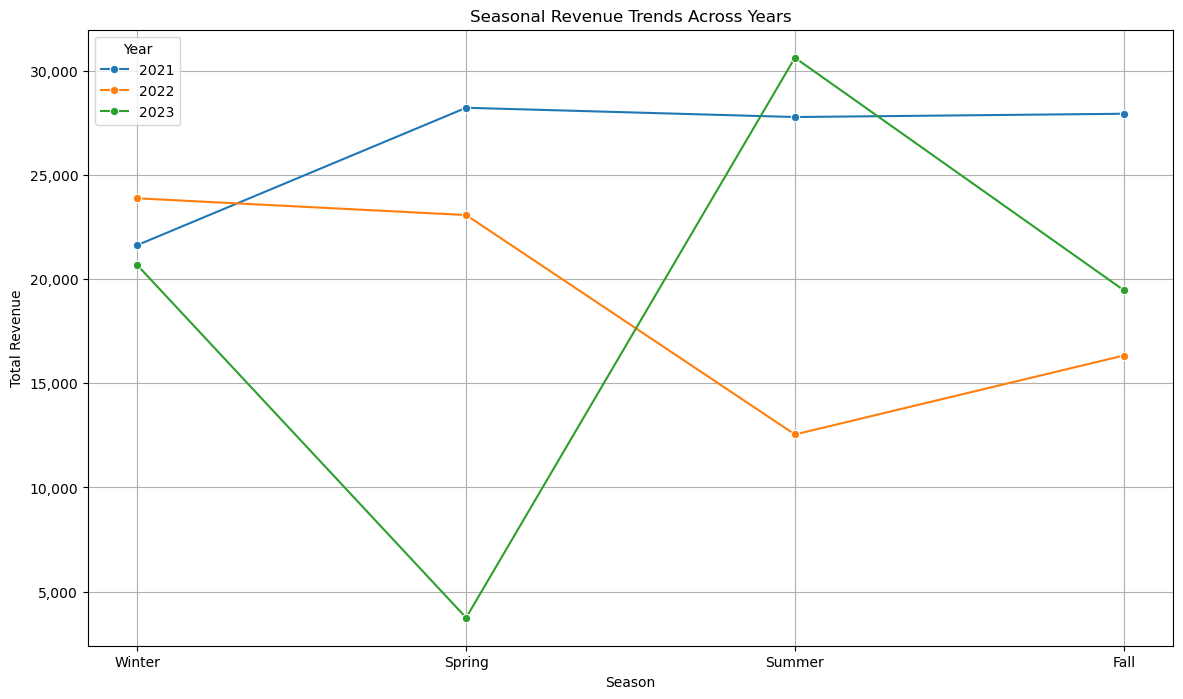

In [153]:
# Group by year and season
time_analysis_by_season = merged_data.groupby(['year', 'season']).agg(
    total_revenue=('total_spend', 'sum'),
    avg_revenue=('total_spend', 'mean')
).reset_index()

# Line plot for seasonal trends across years
plt.figure(figsize=(14, 8))
sns.lineplot(x='season', y='total_revenue', hue='year', data=time_analysis_by_season, marker='o', palette='tab10')

plt.title('Seasonal Revenue Trends Across Years')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.show()


### 4.What are the gender-based preferences for product categories

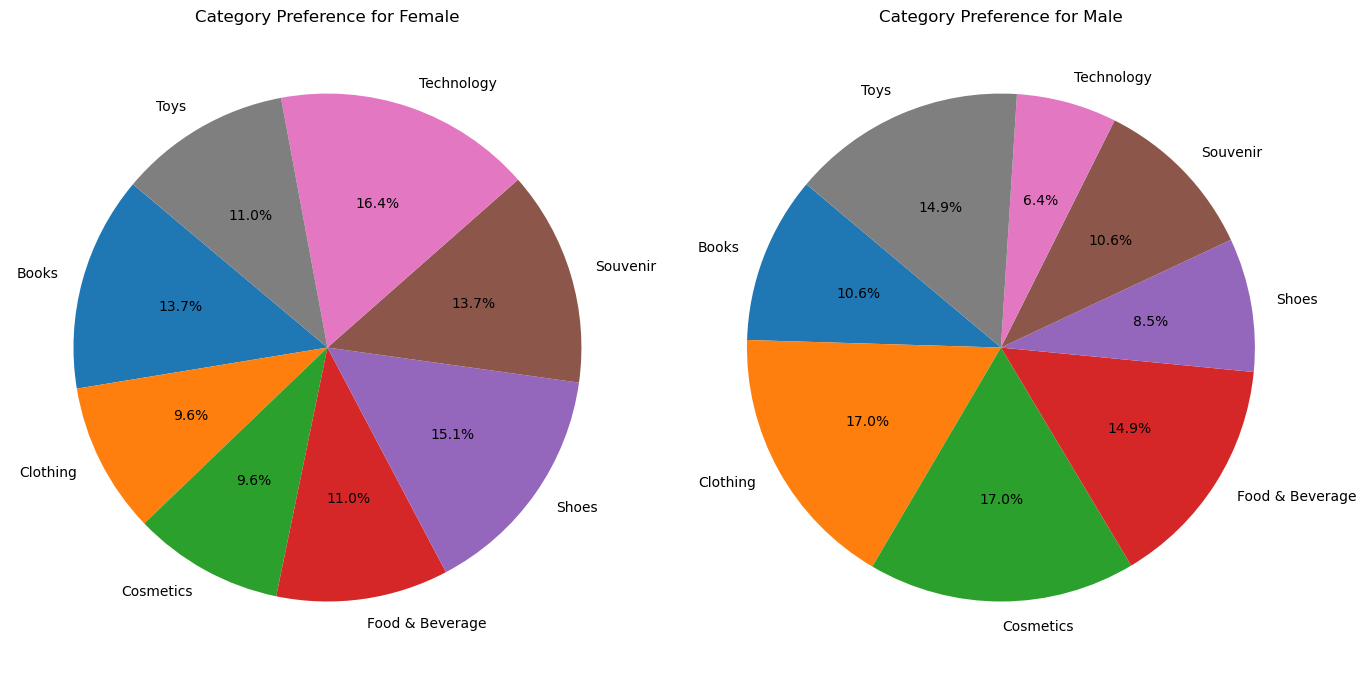

In [165]:
# Group by gender and product category
category_counts = merged_data.groupby(['gender', 'category']).size().unstack(fill_value=0)

# Plot a pie chart for each gender
plt.figure(figsize=(12, 8))

for i, gender in enumerate(category_counts.index):
    plt.subplot(1, 2, i + 1)  # create subplots for each gender
    category_counts.loc[gender].plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(14, 8))
    plt.title(f'Category Preference for {gender}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### 5.What are the differences in spending behavior between male and female customers at the mall?

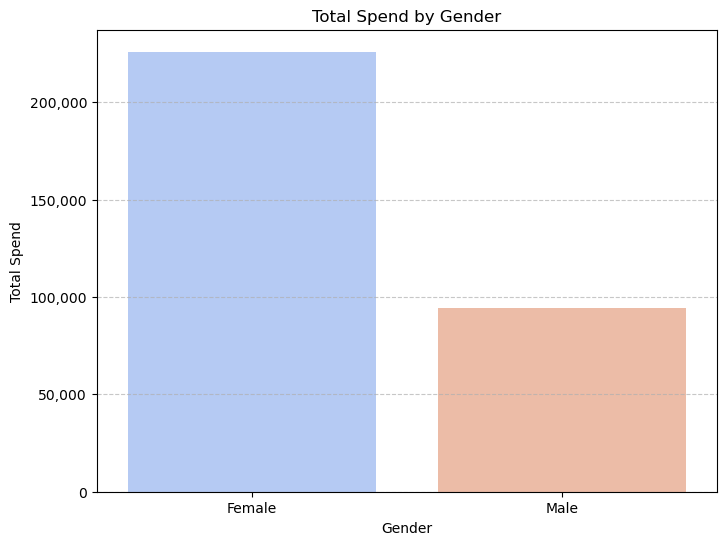

In [167]:
# Gender-based spend analysis
gender_spend_analysis = merged_data.groupby('gender').agg(
    avg_spend=('total_spend', 'mean'),
    total_spend=('total_spend', 'sum')
).reset_index()

# Plot total spend by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='total_spend', data=gender_spend_analysis, hue='gender', palette='coolwarm')

# Add labels and title
plt.title('Total Spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the legend as it's redundant
plt.legend([], [], frameon=False)

# Display the plot
plt.show()

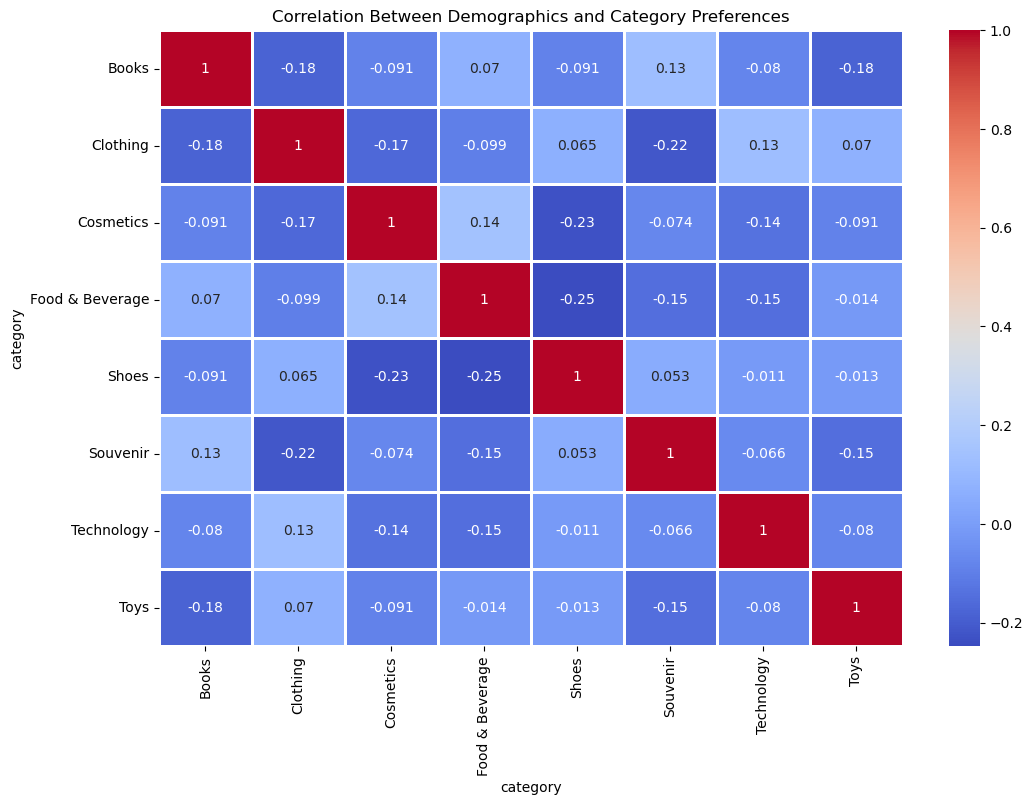

In [175]:
# Create a cross-tabulation of categories by demographics
cross_tab = pd.crosstab([merged_data['age'], merged_data['gender']], merged_data['category'])

# Compute the correlation matrix
corr_matrix = cross_tab.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='white')
plt.title('Correlation Between Demographics and Category Preferences')
plt.show()

### 6.How do different product categories contribute to the overall revenue at the mall?

C:\Users\Brighty Davis\AppData\Local\Temp\ipykernel_32516\1391763674.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='total_revenue', x='category', data=category_revenue, palette='cubehelix')


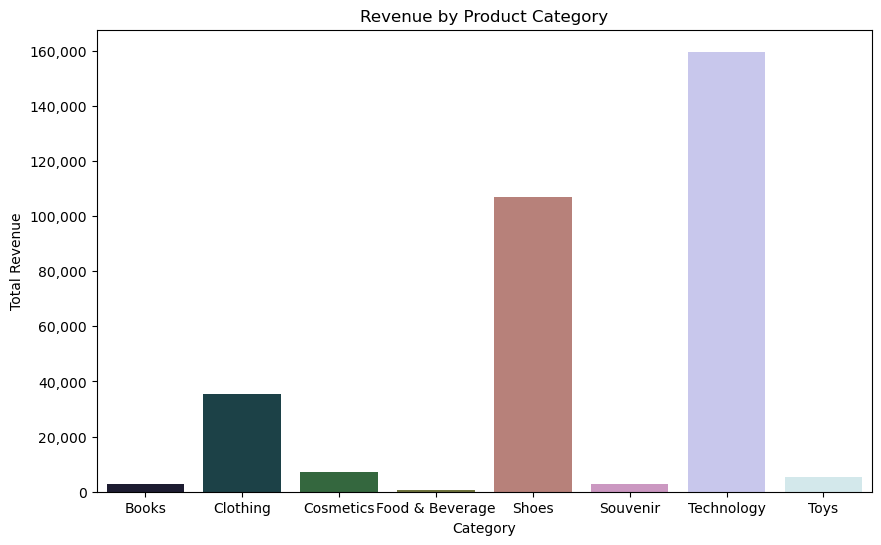

In [195]:
 #Category Insights
# Revenue by product category analysis
category_revenue = merged_data.groupby('category').agg(
    total_revenue=('total_spend', 'sum'),
    avg_price=('price', 'mean')
).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y='total_revenue', x='category', data=category_revenue, palette='cubehelix')

# Add title and labels
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')

# Format the y-axis values for better readability
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Remove the legend as it's redundant
plt.legend([], [], frameon=False)

# Show the plot
plt.show()


### 7.How does the quantity sold vary by season across different periods, and which seasons exhibit higher demand or sales volume?

C:\Users\Brighty Davis\AppData\Local\Temp\ipykernel_32516\1765531420.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_quantity', data=season_quantity, palette='coolwarm')


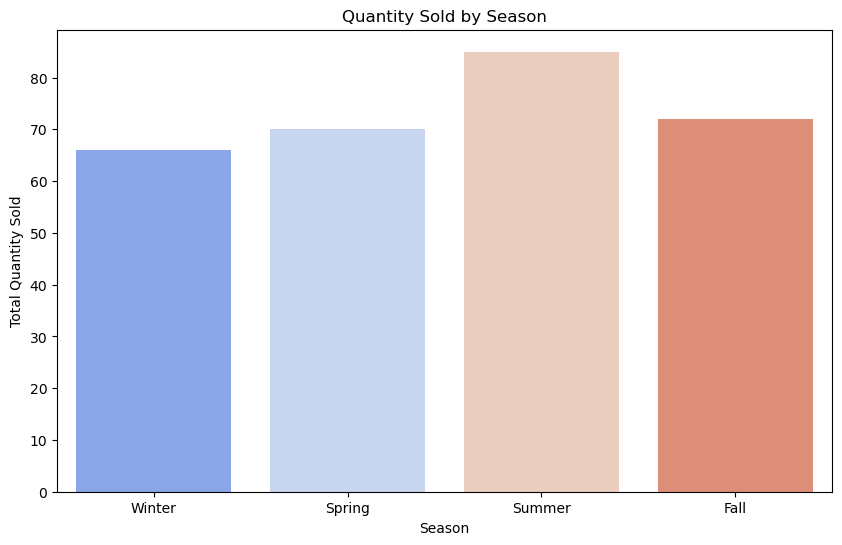

In [204]:
# Aggregate quantity sold by season with observed=True
season_quantity = merged_data.groupby('season', observed=True).agg(
    total_quantity=('quantity', 'sum'),
    avg_quantity=('quantity', 'mean')
).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='total_quantity', data=season_quantity, palette='coolwarm')

# Add title and labels
plt.title('Quantity Sold by Season')
plt.xlabel('Season')
plt.ylabel('Total Quantity Sold')

# Format the y-axis values for better readability
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Remove the legend as it's not required
plt.legend([], [], frameon=False)

# Display the plot
plt.show()



### 8. What trends can be observed in terms of revenue as store counts increase or decrease?Is there a correlation between the total revenue and the average number of stores within each shopping mall?

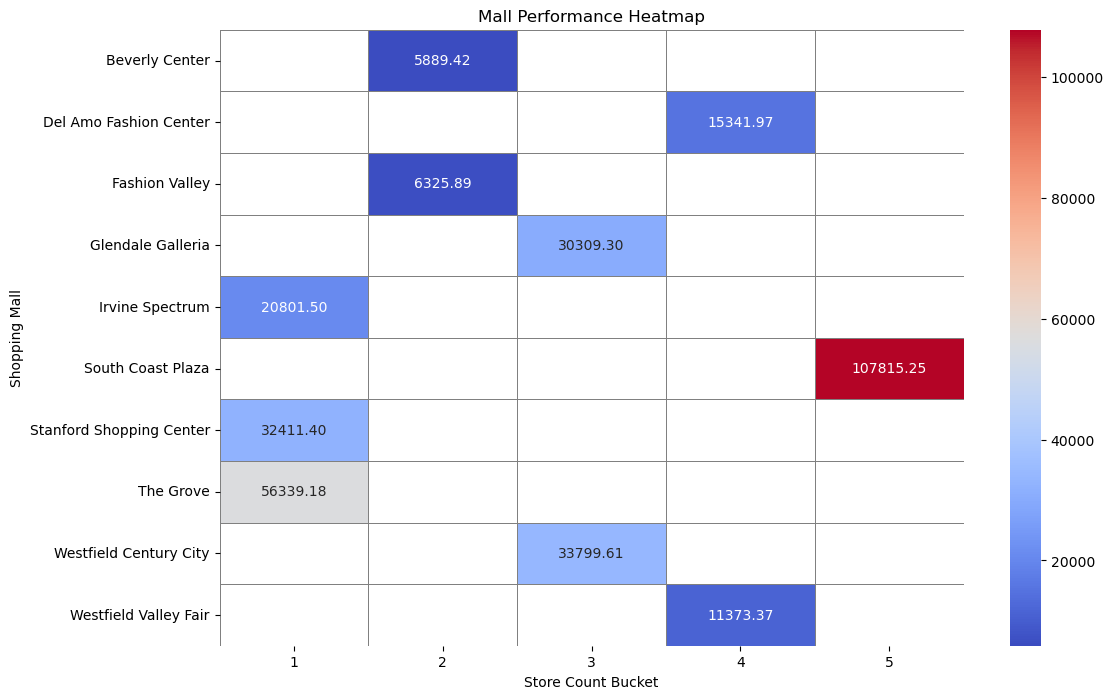

In [206]:
# Aggregate data
mall_performance = merged_data.groupby('shopping_mall').agg(
    total_revenue=('total_spend', 'sum'),
    avg_revenue=('total_spend', 'mean'),
    store_count=('store_count', 'mean')
).reset_index()

# Bucketize 'store_count' into categories for better heatmap visualization
mall_performance['store_count_bucket'] = pd.cut(
    mall_performance['store_count'], 
    bins=5,  # Divide the store counts into 5 bins for grouping
    labels=[1,2,3,4,5]  # These represent intervals/buckets
)

# Pivot the data for heatmap
heatmap_data = mall_performance.pivot(
    index='shopping_mall',
    columns='store_count_bucket',
    values='total_revenue'
)

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Mall Performance Heatmap')
plt.xlabel('Store Count Bucket')
plt.ylabel('Shopping Mall')
plt.show()

### 9.How do the total revenues vary across different product categories over the years

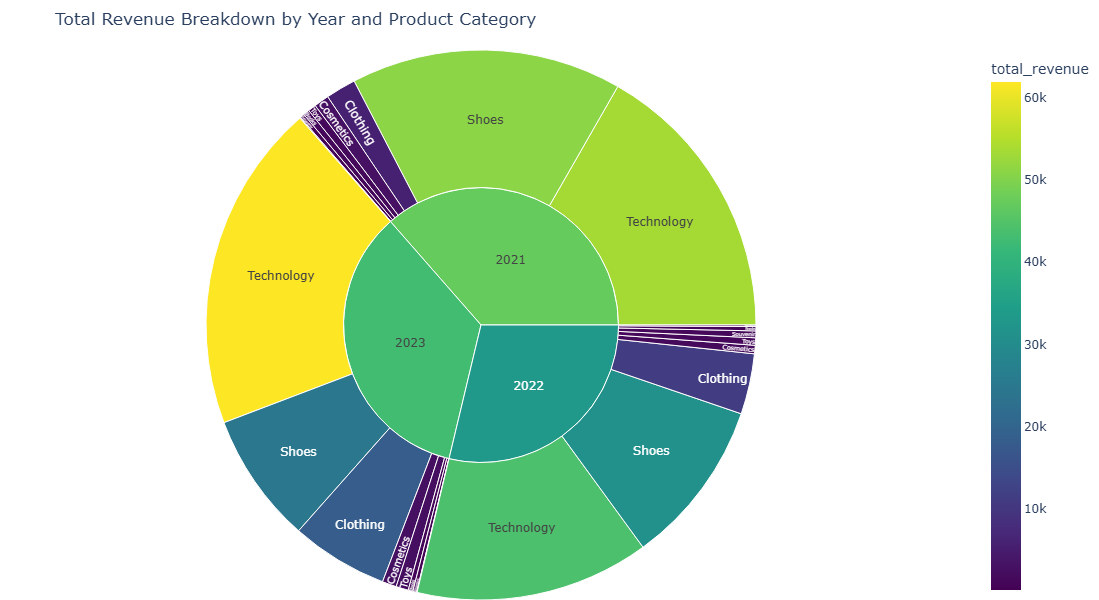

In [215]:
# Group data to calculate total revenue by year and category
category_performance = merged_data.groupby(['year', 'category']).agg(
    total_revenue=('total_spend', 'sum')
).reset_index()

# Prepare the data for the Sunburst chart
sunburst_data = category_performance.copy()

# Create a Sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['year', 'category'],  # Hierarchical levels: Year -> Category
    values='total_revenue',     # Size of each segment
    color='total_revenue',      # Color based on total revenue
    color_continuous_scale='viridis',  # Color scale
    title='Total Revenue Breakdown by Year and Product Category',
)

# Update layout for better visuals
fig.update_layout(
    width=500,  # Set the width of the graph
    height=600,  # Set the height of the graph
    margin=dict(t=50, l=0, r=0, b=0)
)

# Show the plot
fig.show()


### 10.How does the revenue break down across different shopping malls, product categories, and years?

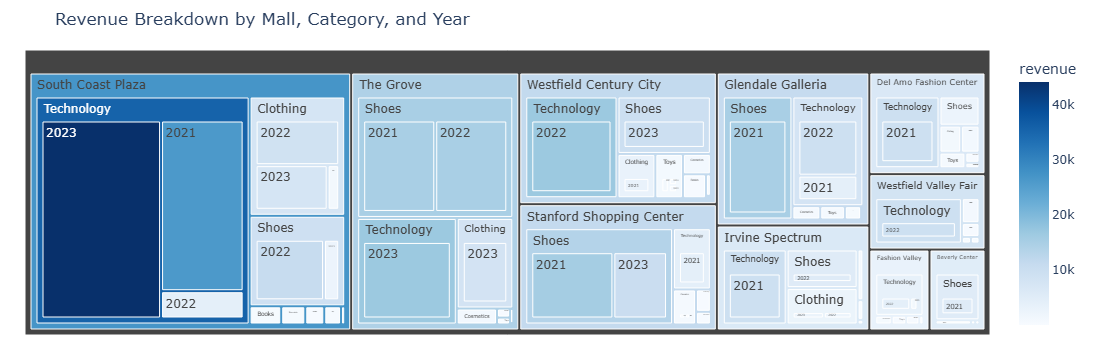

In [218]:
treemap_data = merged_data.groupby(['shopping_mall', 'category', 'year'])['total_spend'].sum().reset_index()
treemap_data.columns = ['mall', 'category', 'year', 'revenue']


fig = px.treemap(
    treemap_data,
    path=['mall', 'category', 'year'],  # Define hierarchy
    values='revenue',
    color='revenue',
    color_continuous_scale='Blues',
    title='Revenue Breakdown by Mall, Category, and Year'
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()




### 11.How does spending behavior vary over time across different months and years?

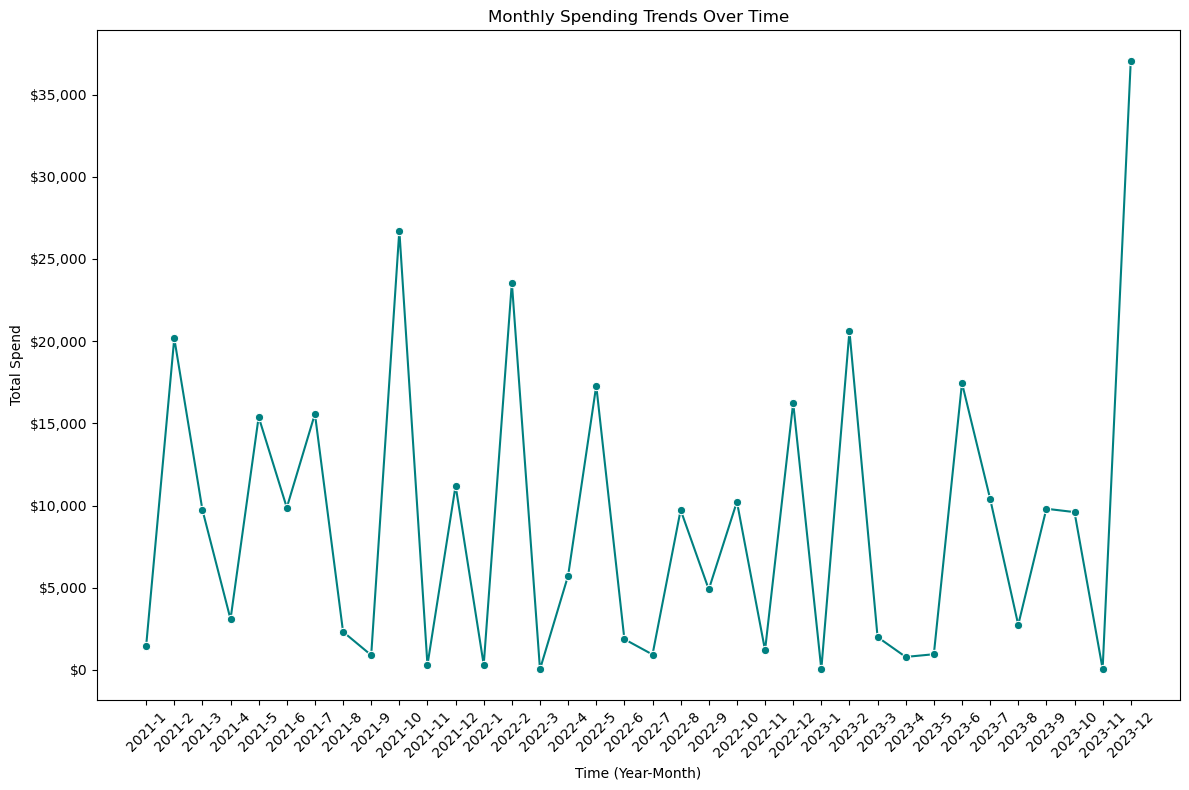

In [225]:
time_trends = merged_data.groupby(['year', 'month'])['total_spend'].sum().reset_index()
time_trends['year_month'] = time_trends['year'].astype(str) + '-' + time_trends['month'].astype(str)

plt.figure(figsize=(12, 8))
sns.lineplot(
    x='year_month',
    y='total_spend',
    data=time_trends,
    marker='o',
    color='teal'
)

plt.title('Monthly Spending Trends Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.show()


### 12. How does foot traffic (measured by total spend) vary over time across different months and seasons?

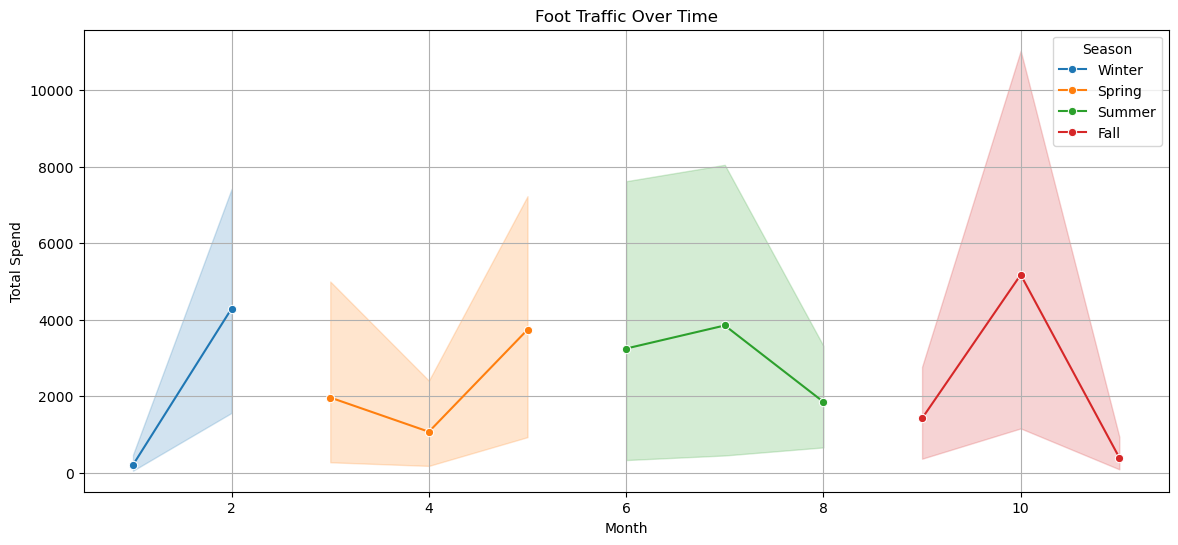

In [231]:
# 1. Line Graph for Foot Traffic Over Time (Daily, Monthly, or Seasonally)
plt.figure(figsize=(14, 6))
sns.lineplot(x='month', y='total_spend', hue='season', data=merged_data, marker='o')
plt.title('Foot Traffic Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend(title='Season')
plt.grid(True)
plt.show()

### 13.What is the distribution of total spend across different seasons?

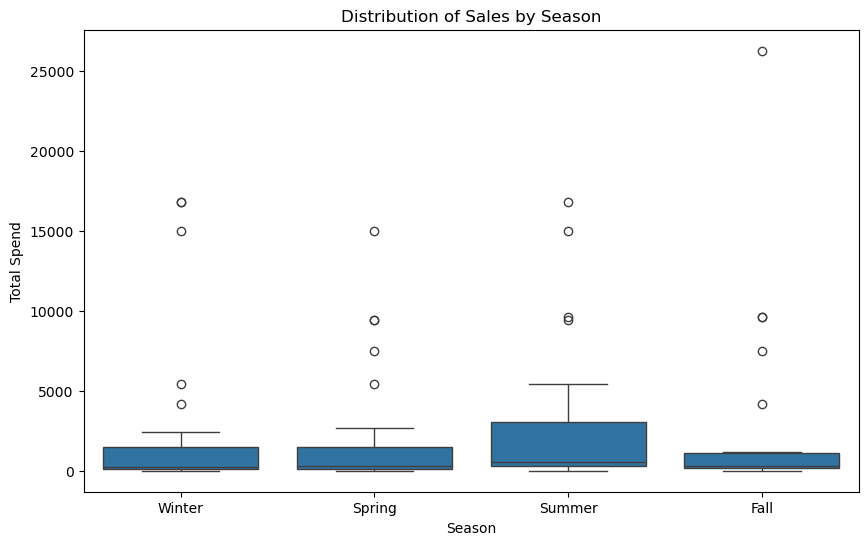

In [241]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='total_spend', data=merged_data)
plt.title('Distribution of Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Spend')
plt.show()

### 14 How can we accurately predict customer categories (Regular, Casual, or Mixed/Low-Confidence) based on their spending behavior, quantity purchased, age, payment method, season, and day of the week?

In [264]:

# Convert categorical variables to numerical using LabelEncoder if needed
label_encoder = LabelEncoder()
merged_data['customer_category'] = label_encoder.fit_transform(merged_data['customer_category'])
merged_data['payment_method'] = label_encoder.fit_transform(merged_data['payment_method'])
merged_data['season'] = label_encoder.fit_transform(merged_data['season'])
merged_data['day_of_week'] = label_encoder.fit_transform(merged_data['day_of_week'])

# Define features and target variable
X = merged_data[['total_spend', 'quantity', 'age', 'payment_method', 'season', 'day_of_week']]
y = merged_data['customer_category']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=300)  # Increase max_iter to 300
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Update the class names for better interpretation
class_names = ['Regular Customer', 'Casual Customer', 'Mixed/Low-Confidence']

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=class_names)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)





Accuracy: 0.9444444444444444
Confusion Matrix:
[[29  0  0]
 [ 0  4  0]
 [ 1  1  1]]
Classification Report:
                      precision    recall  f1-score   support

    Regular Customer       0.97      1.00      0.98        29
     Casual Customer       0.80      1.00      0.89         4
Mixed/Low-Confidence       1.00      0.33      0.50         3

            accuracy                           0.94        36
           macro avg       0.92      0.78      0.79        36
        weighted avg       0.95      0.94      0.93        36



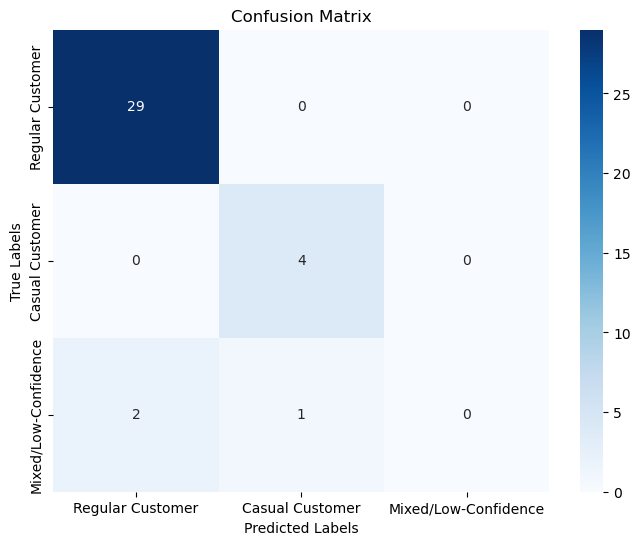

In [278]:

# Plotting the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### 15. How do key demographic variables (total spend, age, customer category, gender, and season) correlate with each other, and what relationships exist that may influence customer purchasing patterns at the mall?

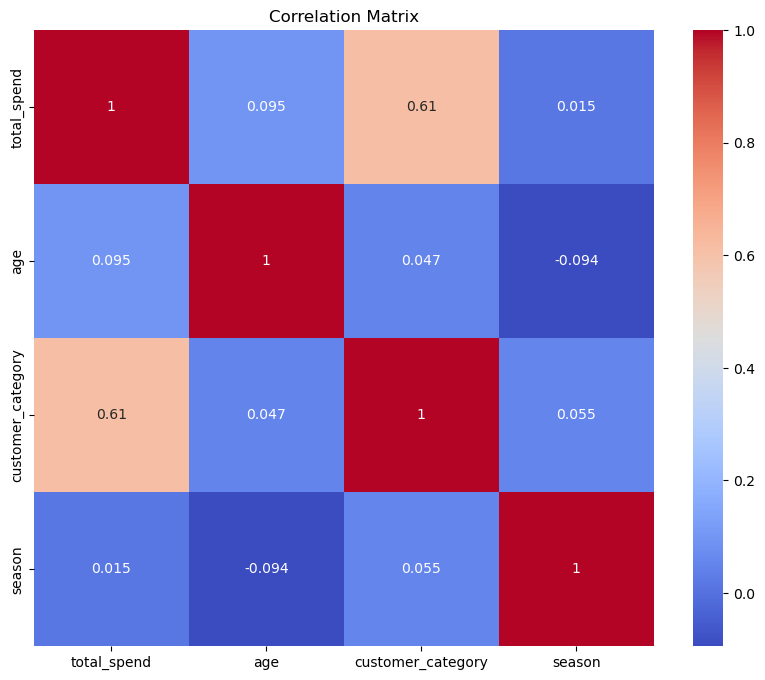

In [308]:



# Specify the columns to include in the analysis
columns_of_interest = ['total_spend', 'age', 'customer_category', 'gender', 'season']

# Select only the specified columns from the dataset
filtered_data = merged_data[columns_of_interest]

# Correlation Analysis
# Exclude non-numeric columns from the correlation matrix calculation
numeric_data = filtered_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()







### 16.How do spending habits vary across different customer segments at the mall?


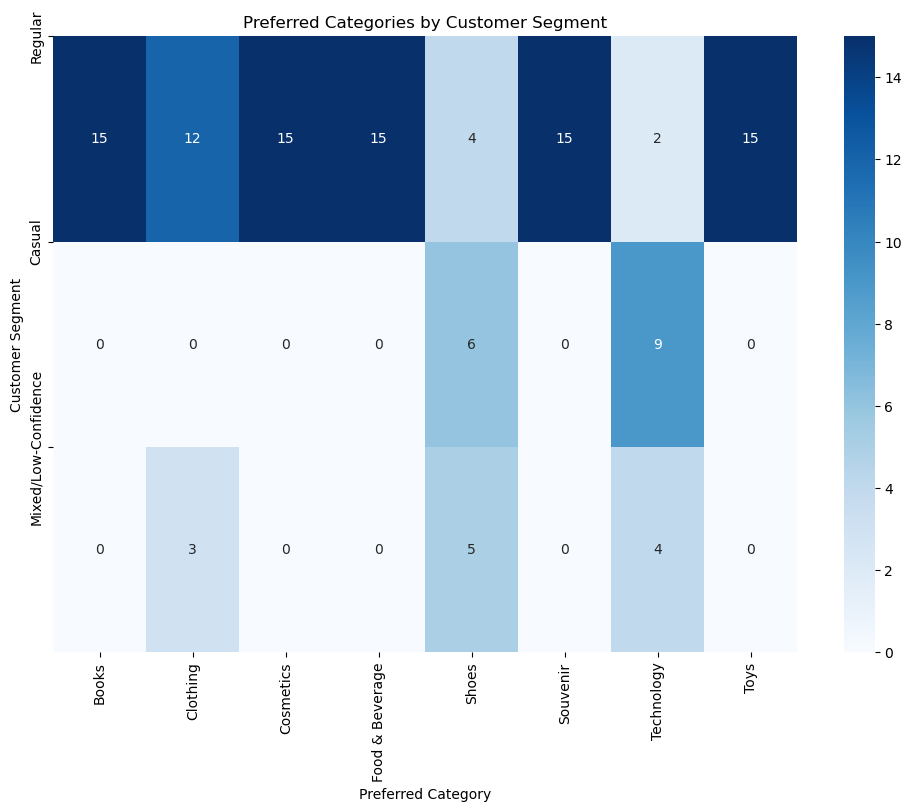

In [338]:

# Customer Segment Names
# Define customer segment names if they are not already provided
# Adjust these names according to your actual data
segment_names = {
    'Regular Customer': 'Regular',
    'Casual Customer': 'Casual',
    'Mixed/Low-Confidence': 'Mixed/Low-Confidence'
}

# Replace the customer category labels with the defined names
merged_data['customer_category'] = merged_data['customer_category'].replace(segment_names)

# Preferred Categories Analysis
# Group by customer category and preferred category to count occurrences
preferred_category = merged_data.groupby(['customer_category', 'category']).size().unstack().fillna(0)

# Plotting the preferred categories across customer segments
plt.figure(figsize=(12, 8))
sns.heatmap(preferred_category, annot=True, cmap='Blues', cbar=True)
plt.title('Preferred Categories by Customer Segment')
plt.xlabel('Preferred Category')
plt.ylabel('Customer Segment')
plt.yticks(ticks=[0, 1, 2], labels=['Regular', 'Casual', 'Mixed/Low-Confidence'])
plt.show()

